In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
%cd ..
%cd data/raw

C:\Users\SiddharthaMisra\Documents\Springboard\Opera_990_Analysis
C:\Users\SiddharthaMisra\Documents\Springboard\Opera_990_Analysis\data\raw


In [2]:
raw_df = pd.read_csv('Form 990s.csv',index_col='Unnamed: 0')
raw_df.head()

,ein,tax_period,total_assets,total_income,total_revenue,pct_exp__current_officers,tax_year,contributed_income,earned_income,investment_income,other_income,year_end_revenue,year_end_assets,year_end_liabilities,total_functional_expenses,admin_expenses
0,813311094,2019-12-01,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,263016871,2018-12-01,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,833139772,2019-12-01,1280.0,26521.0,26521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,462541609,2018-12-01,12908.0,53745.0,50416.0,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,840850527,2018-12-01,12908.0,53745.0,50416.0,0.0,NaN,2792062.0,1385097.0,91.0,7033.0,4123180.0,2069154.0,2048030.0,4426594.0,290481.0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428 entries, 0 to 2427
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ein                        2428 non-null   int64  
 1   tax_period                 2297 non-null   object 
 2   total_assets               2305 non-null   float64
 3   total_income               2305 non-null   float64
 4   total_revenue              2294 non-null   float64
 5   pct_exp__current_officers  1763 non-null   float64
 6   tax_year                   1844 non-null   float64
 7   contributed_income         1763 non-null   float64
 8   earned_income              1763 non-null   float64
 9   investment_income          1763 non-null   float64
 10  other_income               1763 non-null   float64
 11  year_end_revenue           1763 non-null   float64
 12  year_end_assets            1763 non-null   float64
 13  year_end_liabilities       1763 non-null   float

In [4]:
df = raw_df[raw_df['pct_exp__current_officers'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763 entries, 4 to 2426
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ein                        1763 non-null   int64  
 1   tax_period                 1670 non-null   object 
 2   total_assets               1672 non-null   float64
 3   total_income               1672 non-null   float64
 4   total_revenue              1666 non-null   float64
 5   pct_exp__current_officers  1763 non-null   float64
 6   tax_year                   1344 non-null   float64
 7   contributed_income         1763 non-null   float64
 8   earned_income              1763 non-null   float64
 9   investment_income          1763 non-null   float64
 10  other_income               1763 non-null   float64
 11  year_end_revenue           1763 non-null   float64
 12  year_end_assets            1763 non-null   float64
 13  year_end_liabilities       1763 non-null   float

In [5]:
df = df[df['year_end_revenue'] != 0]
df.shape

(1745, 16)

In [6]:
df['equity_ratio'] = (df['year_end_assets'] - df['year_end_liabilities']) / df['year_end_revenue']
df['rev_conc_index'] = (df['contributed_income']/df['year_end_revenue']) ** 2 + (df['earned_income']/df['year_end_revenue']) ** 2 + (df['investment_income']/df['year_end_revenue']) ** 2 + (df['other_income']/df['year_end_revenue']) ** 2
df['admin_cost_ratio'] = df['admin_expenses'] / df['year_end_revenue']
df['surplus_margin'] = (df['year_end_revenue'] - df['total_functional_expenses'])/ df['year_end_revenue']
df.describe()

,ein,total_assets,total_income,total_revenue,pct_exp__current_officers,tax_year,contributed_income,earned_income,investment_income,other_income,year_end_revenue,year_end_assets,year_end_liabilities,total_functional_expenses,admin_expenses,equity_ratio,rev_conc_index,admin_cost_ratio,surplus_margin
count,1.745000e+03,1.655000e+03,1.655000e+03,1.649000e+03,1745.0,1333.000000,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1745.000000,1745.000000,1745.000000,1745.000000
mean,4.802591e+08,7.798203e+06,4.532261e+06,3.651470e+06,0.0,2014.407352,2.300471e+06,1.423816e+06,9.649763e+04,5.970444e+04,4.070644e+06,8.988426e+06,2.590021e+06,3.948131e+06,1.314301e+05,2.271051,1.943854,0.049065,0.028022
std,2.760068e+08,3.940948e+07,2.712296e+07,2.157833e+07,0.0,2.129411,1.086949e+07,9.091479e+06,3.461358e+05,3.350506e+05,2.114146e+07,3.753326e+07,1.876939e+07,2.103147e+07,3.842462e+05,72.958217,40.723283,0.073095,7.647622
min,1.049686e+07,0.000000e+00,0.000000e+00,-4.599000e+04,0.0,2009.000000,0.000000e+00,0.000000e+00,-7.289000e+03,-1.092390e+05,-7.066900e+04,-1.300000e+01,-3.633000e+04,0.000000e+00,0.000000e+00,-1985.764623,0.000000,-0.920129,-166.650000
25%,2.373247e+08,1.382700e+04,4.198300e+04,3.505800e+04,0.0,2013.000000,9.306000e+04,2.531700e+04,0.000000e+00,0.000000e+00,2.386360e+05,1.228310e+05,3.846000e+03,2.203960e+05,0.000000e+00,0.139454,0.448791,0.000000,-0.104892
50%,4.216710e+08,1.614720e+05,3.151250e+05,2.734650e+05,0.0,2015.000000,2.787400e+05,1.562730e+05,4.050000e+02,0.000000e+00,5.401290e+05,6.950360e+05,9.965900e+04,5.191530e+05,1.980400e+04,0.724884,0.532927,0.024626,0.007605
75%,7.312147e+08,1.479752e+06,1.280237e+06,1.154950e+06,0.0,2016.000000,1.080512e+06,4.949950e+05,1.878300e+04,8.574000e+03,1.802947e+06,3.572946e+06,6.378900e+05,1.695937e+06,9.500000e+04,2.767697,0.677401,0.078026,0.121236
max,9.901978e+08,4.523978e+08,3.805460e+08,3.074874e+08,0.0,2018.000000,1.941539e+08,1.552702e+08,3.823075e+06,8.244320e+06,3.620911e+08,4.653829e+08,3.186428e+08,3.243339e+08,4.026288e+06,1001.526407,1672.586522,0.575954,167.478863


In [7]:
def OA_category(x):
    if x >= 15000000:
        return 1
    elif x >= 3000000:
        return 2
    elif x >= 1000000:
        return 3
    else:
        return 4
df['OA_category'] = df['total_functional_expenses'].apply(OA_category)

In [9]:
%cd ..
%cd data/processed

C:\Users\SiddharthaMisra\Documents\Springboard\Opera_990_Analysis
C:\Users\SiddharthaMisra\Documents\Springboard\Opera_990_Analysis\data\processed


In [10]:
df.to_csv('Processed Data.csv')

In [ ]:
ProfileReport(df).to_file('Processed_Data_Profile.html')

C:\Users\SiddharthaMisra\Anaconda3\envs\Opera_990\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SiddharthaMisra\Anaconda3\envs\Opera_990\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SiddharthaMisra\Anaconda3\envs\Opera_990\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SiddharthaMisra\Anaconda3\envs\Opera_990\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


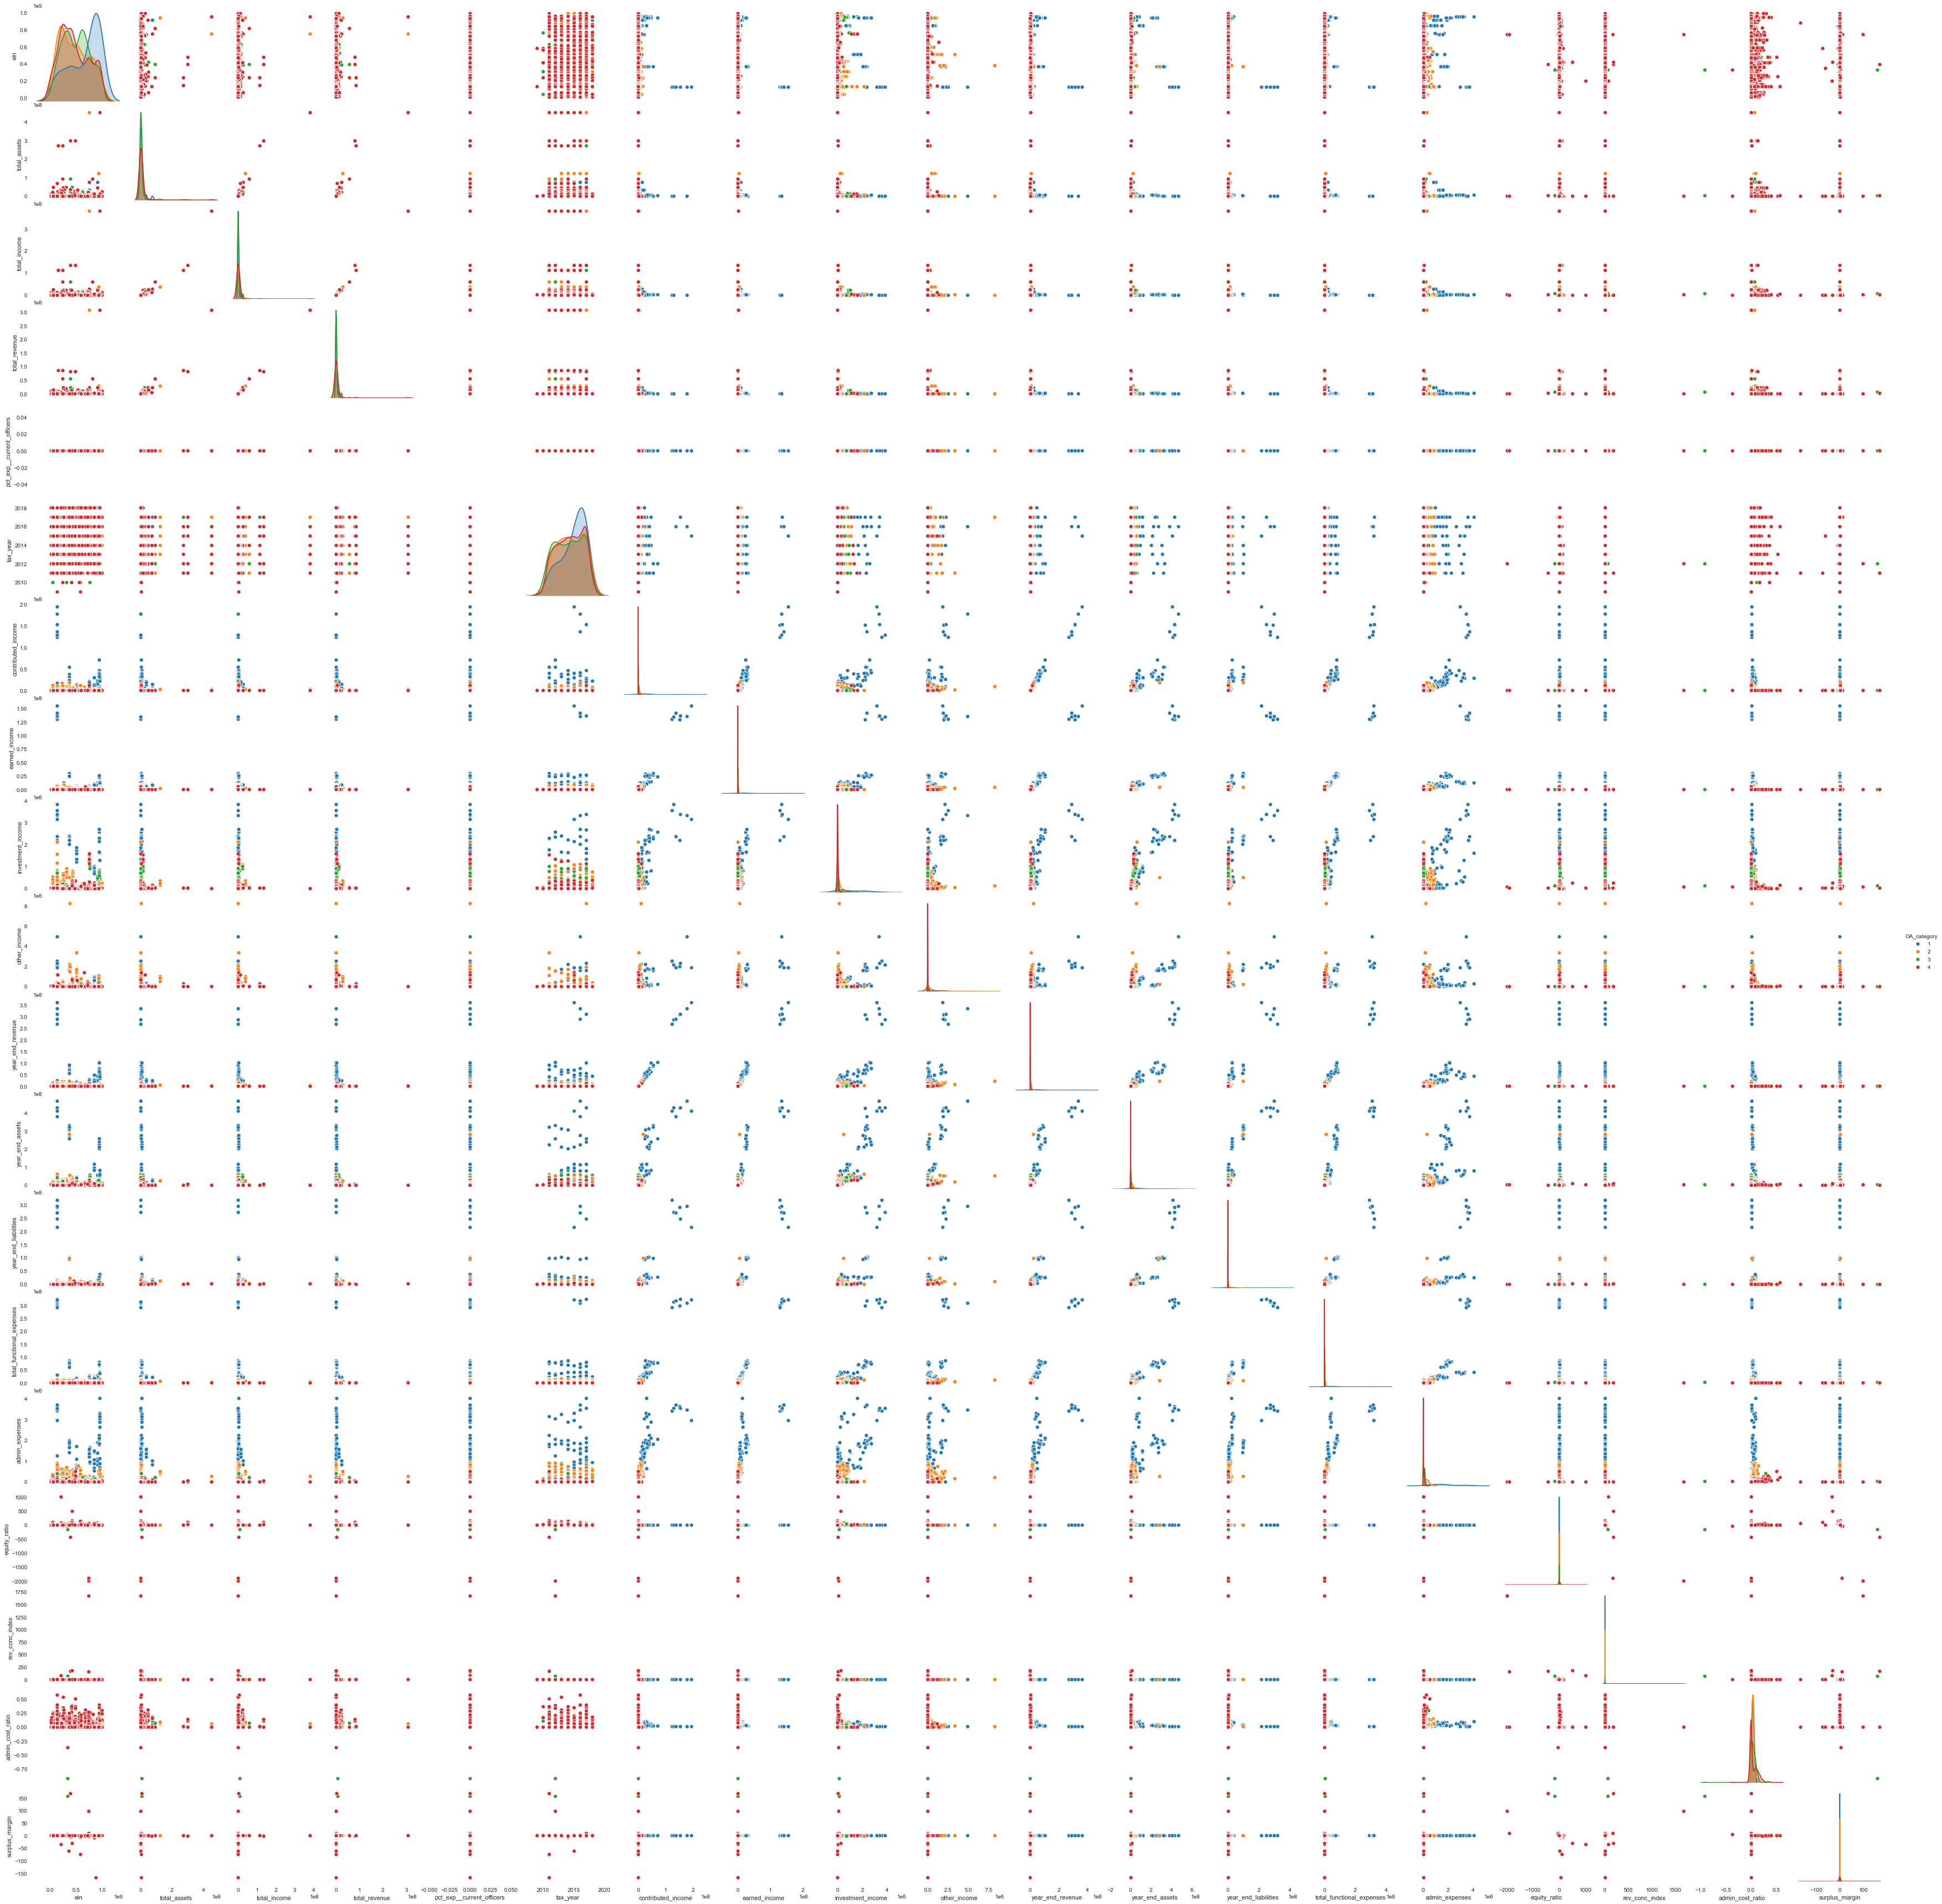

In [12]:
sns.pairplot(df,hue='OA_category').savefig('Pairplots.png')

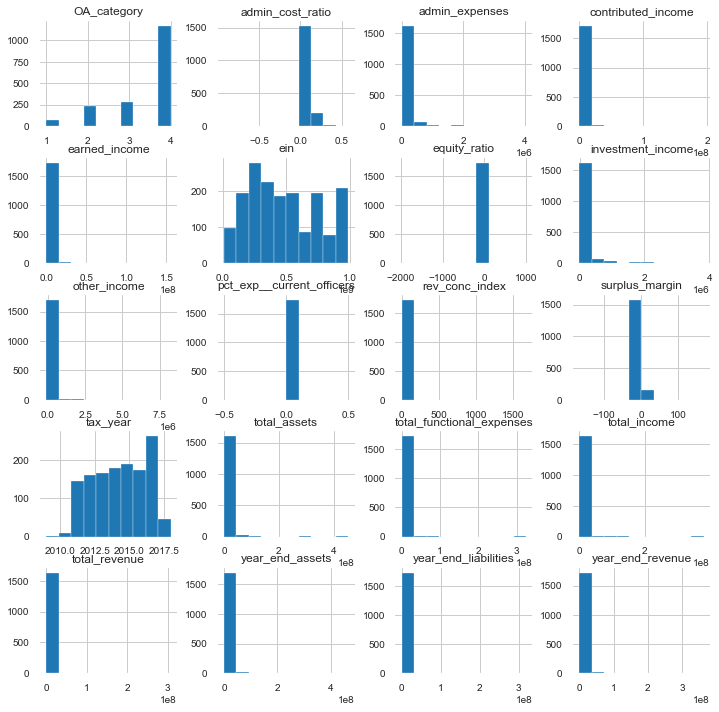

In [14]:
df.hist(figsize = (12,12))
plt.show()

In [15]:
df.describe()

,ein,total_assets,total_income,total_revenue,pct_exp__current_officers,tax_year,contributed_income,earned_income,investment_income,other_income,year_end_revenue,year_end_assets,year_end_liabilities,total_functional_expenses,admin_expenses,equity_ratio,rev_conc_index,admin_cost_ratio,surplus_margin,OA_category
count,1.745000e+03,1.655000e+03,1.655000e+03,1.649000e+03,1745.0,1333.000000,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1.745000e+03,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000
mean,4.802591e+08,7.798203e+06,4.532261e+06,3.651470e+06,0.0,2014.407352,2.300471e+06,1.423816e+06,9.649763e+04,5.970444e+04,4.070644e+06,8.988426e+06,2.590021e+06,3.948131e+06,1.314301e+05,2.271051,1.943854,0.049065,0.028022,3.456160
std,2.760068e+08,3.940948e+07,2.712296e+07,2.157833e+07,0.0,2.129411,1.086949e+07,9.091479e+06,3.461358e+05,3.350506e+05,2.114146e+07,3.753326e+07,1.876939e+07,2.103147e+07,3.842462e+05,72.958217,40.723283,0.073095,7.647622,0.866322
min,1.049686e+07,0.000000e+00,0.000000e+00,-4.599000e+04,0.0,2009.000000,0.000000e+00,0.000000e+00,-7.289000e+03,-1.092390e+05,-7.066900e+04,-1.300000e+01,-3.633000e+04,0.000000e+00,0.000000e+00,-1985.764623,0.000000,-0.920129,-166.650000,1.000000
25%,2.373247e+08,1.382700e+04,4.198300e+04,3.505800e+04,0.0,2013.000000,9.306000e+04,2.531700e+04,0.000000e+00,0.000000e+00,2.386360e+05,1.228310e+05,3.846000e+03,2.203960e+05,0.000000e+00,0.139454,0.448791,0.000000,-0.104892,3.000000
50%,4.216710e+08,1.614720e+05,3.151250e+05,2.734650e+05,0.0,2015.000000,2.787400e+05,1.562730e+05,4.050000e+02,0.000000e+00,5.401290e+05,6.950360e+05,9.965900e+04,5.191530e+05,1.980400e+04,0.724884,0.532927,0.024626,0.007605,4.000000
75%,7.312147e+08,1.479752e+06,1.280237e+06,1.154950e+06,0.0,2016.000000,1.080512e+06,4.949950e+05,1.878300e+04,8.574000e+03,1.802947e+06,3.572946e+06,6.378900e+05,1.695937e+06,9.500000e+04,2.767697,0.677401,0.078026,0.121236,4.000000
max,9.901978e+08,4.523978e+08,3.805460e+08,3.074874e+08,0.0,2018.000000,1.941539e+08,1.552702e+08,3.823075e+06,8.244320e+06,3.620911e+08,4.653829e+08,3.186428e+08,3.243339e+08,4.026288e+06,1001.526407,1672.586522,0.575954,167.478863,4.000000


In [23]:
df.dtypes

ein                            int64
tax_period                    object
total_assets                 float64
total_income                 float64
total_revenue                float64
pct_exp__current_officers    float64
tax_year                     float64
contributed_income           float64
earned_income                float64
investment_income            float64
other_income                 float64
year_end_revenue             float64
year_end_assets              float64
year_end_liabilities         float64
total_functional_expenses    float64
admin_expenses               float64
equity_ratio                 float64
rev_conc_index               float64
admin_cost_ratio             float64
surplus_margin               float64
OA_category                    int64
dtype: object